## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("kc_house_data.csv")

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df[['yr_renovated']].head()

,yr_renovated
0,0.0
1,1991.0
2,NaN
3,0.0
4,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,21587,21588,21589,21590,21591,21592,21593,21594,21595,21596
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,7852140040,9834201367,3448900210,7936000429,2997800021,263000018,6600060120,1523300141,291310100,1523300157
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015,5/12/2014,6/27/2014,1/15/2015,4/15/2015,3/12/2015,...,8/25/2014,1/26/2015,10/14/2014,3/26/2015,2/19/2015,5/21/2014,2/23/2015,6/23/2014,1/16/2015,10/15/2014
price,221900,538000,180000,604000,510000,1.23e+06,257500,291850,229500,323000,...,507250,429000,610685,1.01e+06,475000,360000,400000,402101,400000,325000
bedrooms,3,3,2,4,3,4,3,3,3,3,...,3,3,4,4,3,3,4,2,3,2
bathrooms,1,2.25,1,3,2,4.5,2.25,1.5,1,2.5,...,2.5,2,2.5,3.5,2.5,2.5,2.5,0.75,2.5,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,2270,1490,2520,3510,1310,1530,2310,1020,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,5536,1126,6023,7200,1294,1131,5813,1350,2388,1076
floors,1,2,1,1,1,1,2,1,1,2,...,2,3,2,2,2,3,2,2,2,2
waterfront,NaN,0,0,0,0,0,0,0,0,0,...,NaN,0,0,0,0,0,0,0,NaN,0
view,0,0,0,0,0,0,0,NaN,0,0,...,0,0,NaN,0,0,0,0,0,0,0


In [8]:
#cleaning up sqft_basement data
clean = df.replace("?", np.nan)

In [9]:
clean['sqft_basement'] = clean['sqft_basement'].replace('?',np.nan).astype(float)

In [10]:
# type changes of two columns
clean["sqft_basement"].astype(float)
clean["date"] = pd.to_datetime(clean["date"])

In [11]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [12]:
#exploring missing values
clean.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
clean.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
#exploring missing values of 'view'
condition_view=clean['view']!=np.nan
clean.loc[condition_view,'view'].describe()   

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

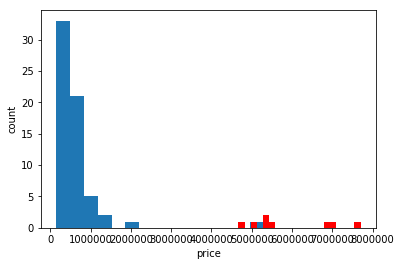

In [15]:
dataframe=clean.loc[clean['view'].isnull()==True]
plt.hist(dataframe['price'],bins=15)
plt.hist(clean.loc[clean['price']>4500000]['price'],bins=20,color='red')
plt.xlabel
plt.xlabel('price')
plt.ylabel('count')
plt.show()    #this is the reason why the points were not dropped as the price for the missing 'view' values
#were concentrated in the extreme ends and we wanted to make sure the points were included in our regression model.
# We see that one of the null view homes is one of very few high-value homes, making it useful in predicting the
# values on this end of the spectrum



In [16]:
clean.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

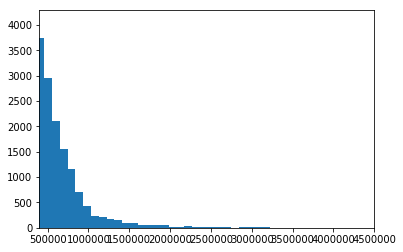

In [17]:
df_sqftbasement=clean.loc[clean['sqft_basement'].isna()==False]

plt.hist(df_sqftbasement['price'],bins=80)
plt.xlim(400000,4500000)

plt.show()

In [18]:
df_sqftbasement['sqft_basement'].describe()

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

Since the null sqft_basement transactions are concentrated in the low end of our price (target value), we chose to retain these records and impute the median of 0.

In [19]:
clean['sqft_basement']=clean['sqft_basement'].replace(np.nan,0)

In [20]:
#cleaning yr_innovated
clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [27]:
dataframe_yr=clean.loc[clean['yr_renovated'].isnull()].copy()

dataframe_yr.loc[dataframe_yr['yr_renovated'].isna(),'yr_renovated']=(
    dataframe_yr.loc[dataframe_yr['yr_renovated'].isnull(),'yr_built'])
dataframe_yr.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,1933,98028,47.7379,-122.233,2720,8062
12,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,...,7,1430,0.0,1927,1927,98028,47.7558,-122.229,1780,12697
23,8091400200,2014-05-16,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,...,7,1070,0.0,1985,1985,98030,47.3533,-122.166,1220,8386
26,1794500383,2014-06-26,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,8,1750,700.0,1915,1915,98119,47.6386,-122.360,1760,3573
28,5101402488,2014-06-24,438000.0,3,1.75,1520,6380,1.0,0.0,0.0,...,7,790,730.0,1948,1948,98115,47.6950,-122.304,1520,6235


In [32]:
clean.loc[clean['yr_renovated'].isna(),'yr_renovated']=(
    clean.loc[clean['yr_renovated'].isnull(),'yr_built'])

clean.loc[clean['yr_renovated']==0,'yr_renovated']=(
    clean.loc[clean['yr_renovated']==0,'yr_built'])
clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503


In [37]:
clean['waterfront_clean']=clean['waterfront']
clean.loc[clean['waterfront_clean'].isna(),'waterfront_clean']=0
clean.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [38]:
clean.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront_clean'],
      dtype='object')

In [22]:
def replace_yr_ren(yr_ren,yr_built):
    """takes two lists and if yr_ren is np.nan, it returns yr_built"""
    output=[]
    for index,year in enumerate(yr_ren):
        if year.isnull() or year==0:
            output.append(yr_built[index])
        else:
            output.append(year)
    return output

In [23]:
clean[['yr_renovated','yr_built']].head()


,yr_renovated,yr_built
0,0.0,1955
1,1991.0,1951
2,NaN,1933
3,0.0,1965
4,0.0,1987


In [24]:
np.nan==None

False

In [25]:
replace_yr_ren(clean['yr_renovated'],clean['yr_built'])

AttributeError: 'float' object has no attribute 'isnull'

In [ ]:
np.array(replace_yr_ren(clean['yr_renovated'],clean['yr_built'])).value_counts()

In [ ]:
clean['yr_rennovated_clean'] = replace_yr_ren(clean['yr_renovated'],clean['yr_built'])
clean.head()

In [ ]:
#graph for the price for the missing 'sqft_basement' values
plt.hist(df_sqftbasement['price'],bins=50)
plt.show()
#the graph shows us the missing sqft_basement are concentrated in low priced homes

In [ ]:
#we could replace the np.nan values of 'view' with 0 but we would like to take a look..
#how the values of price change for the missing values of view


In [ ]:
#creating a flag column for waterfront, first approach
clean["imputed_waterfront"] = clean["waterfront"].replace(np.nan, 0)

#creating a flag column for waterfront, second approach, needs error resolution
#clean["imputed_waterfront_2"] = clean.loc[clean["waterfront"] == np.nan]

#imputing waterfront records to median value, which is zero
clean["waterfront"].replace(np.nan, 0, inplace = True)

In [ ]:
#check if a new column with a headline 'imputed_waterfront' is created
clean.columns

In [ ]:
#To view the two columns 'waterfront'
clean[['waterfront']].isna().sum()

In [ ]:
clean['sqft_basement'].isna().sum()